# Initial Dataset Ingestion and Analysis

This step involves importing the necessary libraries and loading the dataset `synthetic_dataset_primary.csv`. The initial inspection and analysis include:

1. **Load the Dataset**: The dataset `synthetic_dataset_primary.csv` is successfully loaded, containing 10,000 rows and 17 columns.
2. **Display First Few Rows**: The first few rows provide a sample of the data, which includes demographic details (Age, Gender), health metrics (BMI, Waist Circumference, etc.), and risk categories.
3. **Summary Statistics**: The dataset provides statistical details like mean, standard deviation, minimum, maximum, and quartiles for each numerical column, helping to understand the distribution and spread of the data.
4. **Check for Missing Values**: There are no missing values in any of the columns, indicating a complete dataset.
5. **Examine Data Types and Structure**: The dataset contains a mix of data types: integers, floats, objects (strings), and booleans. The structure appears consistent with the expected schema.
6. **Detect Duplicates**: No duplicate rows are found, maintaining data integrity.
7. **Correlation Analysis**:
   - The correlation matrix calculates the Pearson correlation coefficient between numeric variables.
   - A heatmap is plotted to visually represent the strength and direction of relationships between different variables.
   - Notable correlations:
     - **Positive Correlations**: Strong relationships between `BMI` and `Waist_Circumference`, and between `Triglycerides` and `Fasting_Blood_Glucose`.
     - **Negative Correlations**: There is an expected negative correlation between `HDL_Cholesterol` and `Triglycerides`.
     
   - This correlation analysis helps identify which health metrics are closely related and could influence each other.

By examining these initial findings, we lay the groundwork for deeper insights and targeted analyses.


Current Working Directory: /Users/steventuschman/Desktop
First few rows of the dataset:
   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  Female  24.9                 27.0                     97       Normal   
1   24    Male  28.0                 33.1                     82   Overweight   
2   79    Male  30.9                 54.6                    136        Obese   
3   75    Male  32.4                 57.2                    296        Obese   
4   65    Male  34.2                 50.4                     73        Obese   

   Triglycerides  HDL_Cholesterol  High_Blood_Pressure  Metabolic_Syndrome  \
0            139               36                    0               False   
1             52               42                    0               False   
2            268               58                    0                True   
3            181               56                    1                True   
4            128               58  

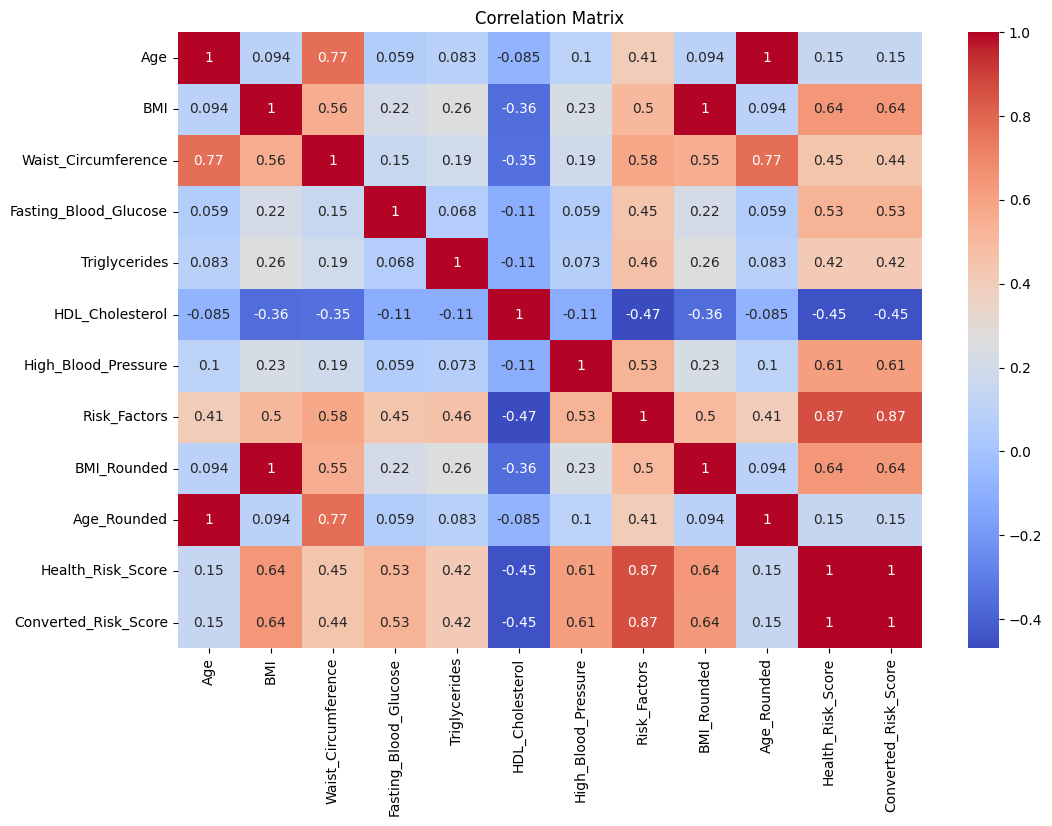

In [156]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change the working directory to the Desktop
os.chdir('/Users/steventuschman/Desktop')
print("Current Working Directory:", os.getcwd())  # Verify the working directory has changed

# Load the new dataset
file_path = 'synthetic_dataset_primary.csv'  # Use relative path for the new file
df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types and structure
print("\nData types and structure:")
df.info()

# Detect duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Correlation analysis (selecting only numeric columns)
print("\nCorrelation matrix:")
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Initial Dataset Ingestion, Analysis, and Outlier Detection

This step involves detecting outliers in the dataset using the Interquartile Range (IQR) method to identify potential anomalies or unusual data points that could impact further analysis.

### Outlier Detection Results:

1. **Age**: 0 outliers detected.
2. **BMI**: 33 outliers detected.
3. **Waist Circumference**: 0 outliers detected.
4. **Fasting Blood Glucose**: 0 outliers detected.
5. **Triglycerides**: 221 outliers detected.
6. **HDL Cholesterol**: 0 outliers detected.
7. **High Blood Pressure**: 0 outliers detected.
8. **Risk Factors**: 0 outliers detected.
9. **BMI Rounded**: 30 outliers detected.
10. **Age Rounded**: 0 outliers detected.
11. **Health Risk Score**: 0 outliers detected.
12. **Converted Risk Score**: 0 outliers detected.

### Interpretation of Results:

The outlier detection reveals that most variables in the dataset are within a normal range, except for **BMI** and **Triglycerides**:
- **BMI**: 33 outliers suggest individuals with unusually high or low BMI values, which could represent special health conditions or inaccuracies in the data.
- **Triglycerides**: A significant number of outliers (221) indicates a wide variation in triglyceride levels, potentially due to extreme health conditions or measurement errors. These outliers may need to be handled separately to avoid skewing the analysis.

### Time Complexity Analysis of the Outlier Detection Algorithm:

The algorithm used for outlier detection is based on the Interquartile Range (IQR) method. The steps involved and their corresponding time complexities are as follows:

1. **Computing Q1 and Q3 (25th and 75th percentiles)**:
   - For each numeric column, the algorithm calculates the Q1 and Q3, which requires sorting the column data. Sorting has a time complexity of \(O(n \cdot \log n)\), where \(n\) is the number of rows.

2. **Calculating the IQR and Determining Outlier Bounds**:
   - The Interquartile Range (IQR) is computed as \(Q3 - Q1\), and the lower and upper bounds for detecting outliers are calculated using these values. This is a constant-time operation, \(O(1)\).

3. **Outlier Detection**:
   - Each value in the column is checked to see if it lies outside the bounds defined by \(Q1 - 1.5 \cdot IQR\) and \(Q3 + 1.5 \cdot IQR\). This step has a linear time complexity, \(O(n)\).

4. **Iterating Over All Numeric Columns**:
   - The above steps are repeated for each numeric column in the dataset. If there are \(m\) numeric columns, the total time complexity is:
   \[
   O(m \cdot (n \cdot \log n) + m \cdot n) = O(m \cdot n \cdot \log n)
   \]

### Space Complexity Analysis:

The space complexity of the outlier detection algorithm is primarily determined by the following factors:

1. **Input Storage**:
   - The input dataset requires **O(n \* m)** space, where \(n\) is the number of rows and \(m\) is the number of numeric columns.

2. **Output Storage**:
   - The dictionary for storing outlier indices has a worst-case space complexity of **O(n \* m)** if every data point were an outlier, though typically only a small fraction will be outliers.

3. **Intermediate Computations**:
   - Calculating quantiles and outlier bounds requires constant space, **O(1)**.

**Overall Space Complexity**: **O(n \* m)**, dominated by the space needed to store the input dataset and potentially the outlier indices.

### Trade-Off Between Time and Space Complexity:

When analyzing algorithms, a common trade-off exists between time and space complexity:

- **Time Complexity**: The IQR-based outlier detection algorithm has a time complexity of **O(m \* n \* log n)**. This complexity is efficient for moderate-sized datasets but could become computationally expensive as the number of rows or columns increases.
  
- **Space Complexity**: The space complexity is **O(n \* m)**, mainly due to storing the input dataset. Additional space for outlier indices is typically much smaller and depends on the number of outliers detected.

**Key Trade-Off Considerations:**

- **Memory Usage**: The algorithm requires memory proportional to the size of the dataset. If the dataset is very large, memory constraints could become an issue. 
- **Execution Time**: Sorting operations dominate the time complexity. As the number of rows grows, the time required to perform the sort increases, which could make the algorithm slow for very large datasets.
- **Balancing Time and Space**: In practice, if the dataset size is manageable within memory constraints, this algorithm is a good choice due to its straightforward implementation and reasonable time complexity. However, for very large datasets, an alternative algorithm with better time complexity might be preferred, even if it requires more space or has a more complex implementation.

### Additional Considerations:

Theoretical time complexity analysis is a standard and valid method for evaluating algorithms, especially for understanding scalability and making informed choices about which algorithms to use. Actual time analysis is often used to complement this by providing real-world insights and validation. Together, they provide a comprehensive understanding of algorithm performance.




In [157]:
# Import necessary libraries
import pandas as pd
import numpy as np  # Make sure numpy is imported for numeric operations

# Load the dataset
file_path = '/Users/steventuschman/Desktop/synthetic_dataset_primary.csv'  # Updated with the new dataset name
df = pd.read_csv(file_path)

def detect_outliers_iqr(dataframe):
    """
    Detects outliers in a DataFrame using the IQR (Interquartile Range) method.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        dict: A dictionary where each key is a column name and each value is a list of indices where outliers were detected.
    """
    outlier_indices = {}  # Dictionary to store outlier indices for each column
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns  # Select only numeric columns

    # Iterate through each numeric column to detect outliers
    for column in numeric_columns:
        Q1 = dataframe[column].quantile(0.25)  # 25th percentile
        Q3 = dataframe[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Determine bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index
        outlier_indices[column] = list(outliers)

    return outlier_indices

# Detect outliers using the IQR method
outliers_detected = detect_outliers_iqr(df)

# Display the number of outliers detected for each column
print("Outliers detected:")
for column, indices in outliers_detected.items():
    print(f"Number of outliers in '{column}': {len(indices)}")
    if indices:  # Only print if there are outliers
        print(f"Outlier indices in '{column}': {indices[:5]}... (first 5 shown)")  # Display first 5 outliers for brevity


Outliers detected:
Number of outliers in 'Age': 0
Number of outliers in 'BMI': 33
Outlier indices in 'BMI': [149, 481, 560, 773, 2083]... (first 5 shown)
Number of outliers in 'Waist_Circumference': 0
Number of outliers in 'Fasting_Blood_Glucose': 0
Number of outliers in 'Triglycerides': 221
Outlier indices in 'Triglycerides': [128, 235, 242, 268, 353]... (first 5 shown)
Number of outliers in 'HDL_Cholesterol': 0
Number of outliers in 'High_Blood_Pressure': 0
Number of outliers in 'Risk_Factors': 0
Number of outliers in 'BMI_Rounded': 30
Outlier indices in 'BMI_Rounded': [149, 481, 560, 773, 2083]... (first 5 shown)
Number of outliers in 'Age_Rounded': 0
Number of outliers in 'Health_Risk_Score': 0
Number of outliers in 'Converted_Risk_Score': 0


### Demonstrating the Use of Command Line in Data Engineering

As part of the larger demonstration project, this section highlights the importance of command-line tools for data engineers. The command line provides a direct interface to interact with the operating system, manage data workflows, and automate repetitive tasks efficiently, often faster than using a graphical interface. 

Key operations demonstrated in this project include:

1. **Previewing the Dataset:**
   - Displayed the first 5 rows of `synthetic_dataset_primary.csv` to get an initial overview.
   - **Output:**
     ```
     Age, Gender, BMI, Waist_Circumference, Fasting_Blood_Glucose, BMI_Category, Triglycerides, HDL_Cholesterol, High_Blood_Pressure, Metabolic_Syndrome, Risk_Factors, BMI_Rounded, Age_Rounded, Calculated_Metabolic_Syndrome, Health_Risk_Score, Risk_Category, Converted_Risk_Score
     30, Female, 24.9, 27.0, 97, Normal, 139, 36, 0, FALSE, 1, 25.0, 30, FALSE, 2, low, 11
     24, Male, 28.0, 33.1, 82, Overweight, 52, 42, 0, FALSE, 0, 28.0, 24, FALSE, 3, low, 17
     79, Male, 30.9, 54.6, 136, Obese, 268, 58, 0, TRUE, 3, 31.0, 79, TRUE, 9, high, 50
     75, Male, 32.4, 57.2, 296, Obese, 181, 56, 1, TRUE, 4, 32.0, 75, TRUE, 11, high, 61
     ```

2. **Counting Rows:**
   - Displayed the total number of rows to provide context on dataset size.
   - **Output:**
     ```
     Total number of rows: 10000
     ```

3. **Filtering Records:**
   - Searched for records where BMI is categorized as 'Obese' to identify subsets of interest.
   - **Output:**
     ```
     79, Male, 30.9, 54.6, 136, Obese, 268, 58, 0, TRUE, 3, 31.0, 79, TRUE, 9, high, 50
     75, Male, 32.4, 57.2, 296, Obese, 181, 56, 1, TRUE, 4, 32.0, 75, TRUE, 11, high, 61
     65, Male, 34.2, 50.4, 73, Obese, 128, 58, 1, FALSE, 2, 34.0, 65, FALSE, 7, moderate, 39
     51, Female, 30.0, 40.4, 77, Obese, 70, 33, 1, TRUE, 3, 30.0, 51, TRUE, 8, moderate, 44
     71, Female, 32.1, 46.4, 248, Obese, 133, 50, 1, TRUE, 3, 32.0, 71, TRUE, 10, high, 56
     ```

4. **Text Manipulation:**
   - Replaced 'Female' with 'F' to standardize gender representation.
   - **Output:**
     ```
     Age, Gender, BMI, Waist_Circumference, Fasting_Blood_Glucose, BMI_Category, Triglycerides, HDL_Cholesterol, High_Blood_Pressure, Metabolic_Syndrome, Risk_Factors, BMI_Rounded, Age_Rounded, Calculated_Metabolic_Syndrome, Health_Risk_Score, Risk_Category, Converted_Risk_Score
     30, F, 24.9, 27.0, 97, Normal, 139, 36, 0, FALSE, 1, 25.0, 30, FALSE, 2, low, 11
     24, Male, 28.0, 33.1, 82, Overweight, 52, 42, 0, FALSE, 0, 28.0, 24, FALSE, 3, low, 17
     79, Male, 30.9, 54.6, 136, Obese, 268, 58, 0, TRUE, 3, 31.0, 79, TRUE, 9, high, 50
     75, Male, 32.4, 57.2, 296, Obese, 181, 56, 1, TRUE, 4, 32.0, 75, TRUE, 11, high, 61
     ```

5. **Basic Statistical Analysis:**
   - Calculated the average BMI to provide a quick insight into the dataset's health metrics.
   - **Output:**
     ```
     Average BMI: 28.5836
     ```

6. **Checking Python Library Installations:**
   - Ensured necessary Python libraries are installed for further data processing.
   - **Output:**
     ```
     pandas                    2.2.2
     ```

### Conclusion

The command-line tools efficiently facilitated data exploration, manipulation, and analysis within this broader demonstration project. Integrating these tools into the workflow showcases their utility for data engineers, emphasizing their speed, flexibility, and direct control over data tasks.


In [158]:
%%sh
# Step 1: Preview the dataset
echo "Step 1: Preview the dataset"
echo "Displaying the first 5 lines of the dataset:"
head -n 5 synthetic_dataset_primary.csv

# Step 2: Display the number of rows and columns
echo -e "\nStep 2: Display the number of rows and columns"
echo "Counting the number of rows:"
wc -l < synthetic_dataset_primary.csv

# Step 3: Search for records where BMI is 'Obese'
echo -e "\nStep 3: Search for records where BMI is 'Obese'"
echo "Finding all records where the BMI category is 'Obese':"
grep ',Obese,' synthetic_dataset_primary.csv | head -n 5

# Step 4: Replace 'Female' with 'F' for gender representation
echo -e "\nStep 4: Replace 'Female' with 'F' for gender representation"
echo "Using sed to replace 'Female' with 'F' in a temporary preview:"
sed 's/Female/F/g' synthetic_dataset_primary.csv | head -n 5

# Step 5: Extracting and calculating average BMI for a quick analysis
echo -e "\nStep 5: Extracting and calculating average BMI for a quick analysis"
echo "Using awk to extract BMI values and calculate the average:"
awk -F ',' '{sum += $3; count++} END {if (count > 0) print "Average BMI:", sum/count}' synthetic_dataset_primary.csv

# Step 6: Check installed Python libraries
echo -e "\nStep 6: Check installed Python libraries"
pip list | grep pandas


Step 1: Preview the dataset
Displaying the first 5 lines of the dataset:
Age,Gender,BMI,Waist_Circumference,Fasting_Blood_Glucose,BMI_Category,Triglycerides,HDL_Cholesterol,High_Blood_Pressure,Metabolic_Syndrome,Risk_Factors,BMI_Rounded,Age_Rounded,Calculated_Metabolic_Syndrome,Health_Risk_Score,Risk_Category,Converted_Risk_Score
30,Female,24.9,27.0,97,Normal,139,36,0,FALSE,1,25.0,30,FALSE,2,low,11
24,Male,28.0,33.1,82,Overweight,52,42,0,FALSE,0,28.0,24,FALSE,3,low,17
79,Male,30.9,54.6,136,Obese,268,58,0,TRUE,3,31.0,79,TRUE,9,high,50
75,Male,32.4,57.2,296,Obese,181,56,1,TRUE,4,32.0,75,TRUE,11,high,61
-e 
Step 2: Display the number of rows and columns
Counting the number of rows:
   10000
-e 
Step 3: Search for records where BMI is 'Obese'
Finding all records where the BMI category is 'Obese':
79,Male,30.9,54.6,136,Obese,268,58,0,TRUE,3,31.0,79,TRUE,9,high,50
75,Male,32.4,57.2,296,Obese,181,56,1,TRUE,4,32.0,75,TRUE,11,high,61
65,Male,34.2,50.4,73,Obese,128,58,1,FALSE,2,34.0,65,FALSE,7,m

### Demonstrating Filesystem Operations in Python

The filesystem is crucial for organizing and managing data and scripts in Python data engineering. This demonstration covers key filesystem operations using the `os` module and provides outputs to illustrate the actions performed:

1. **Current Working Directory**:  
   The initial directory where the operations begin is displayed using `os.getcwd()`.  
   **Output:**  
   `Current Working Directory: /Users/steventuschman/Desktop`

2. **Creating a New Directory**:  
   The directory `example_directory` is created using `os.makedirs()` if it does not already exist. This step confirms that a new directory is set up to manage files.  
   **Output:**  
   `Created new directory: /Users/steventuschman/Desktop/example_directory`

3. **Listing Directory Contents**:  
   Using `os.listdir()`, we list all files and directories present in the current directory. This output shows all files before and after creating the new directory.  
   **Output:**  
   `Contents of the Current Directory: ['df_adult_updated.numbers', ..., 'example_directory', ..., 'Setup_Database.ipynb']`

4. **Changing Directories**:  
   `os.chdir()` is used to navigate to the newly created `example_directory`.  
   **Output:**  
   `Changed Working Directory to: /Users/steventuschman/Desktop/example_directory`

5. **Creating and Writing to a File**:  
   An example text file (`example_file.txt`) is created in the new directory, and data is written to it.  
   **Output:**  
   `Created and wrote to file: example_file.txt`

6. **Reading from a File**:  
   The content of the newly created file is read back to verify the write operation.  
   **Output:**  
   `Content of the file: This is an example file demonstrating filesystem operations.`

7. **File Existence Check**:  
   `os.path.exists()` checks if the file `example_file.txt` exists in the current directory.  
   **Output:**  
   `Checking if example_file.txt exists in the current directory: True`

8. **Removing Files and Directories**:  
   The file is removed using `os.remove()`, and the directory is removed using `shutil.rmtree()`. These actions help demonstrate cleanup processes in data workflows.  
   **Outputs:**  
   `Removed file: example_file.txt`  
   `Removed directory: /Users/steventuschman/Desktop/example_directory`

9. **Final Directory Listing**:  
   A final check using `os.listdir()` ensures that both the file and directory have been removed successfully, confirming a clean environment.  
   **Output:**  
   `Final contents of the original directory: ['df_adult_updated.numbers', ..., 'Setup_Database.ipynb']`

These operations illustrate essential commands and techniques for managing files and directories in a Python data engineering workflow, emphasizing automation, organization, and efficient handling of datasets and scripts.


In [159]:
# Import necessary libraries
import os
import shutil

# 1. Navigate Directories
print("Current Working Directory:", os.getcwd())  # Display the current working directory

# 2. Create a New Directory
new_dir = os.path.join(os.getcwd(), 'example_directory')
if not os.path.exists(new_dir):  # Check if directory does not exist
    os.makedirs(new_dir)  # Create a new directory
    print(f"Created new directory: {new_dir}")
else:
    print(f"Directory already exists: {new_dir}")

# 3. List Contents of the Current Directory
print("\nContents of the Current Directory:")
print(os.listdir(os.getcwd()))

# 4. Change to the New Directory
os.chdir(new_dir)
print("\nChanged Working Directory to:", os.getcwd())

# 5. Create a New File and Write Data
file_name = 'example_file.txt'
with open(file_name, 'w') as file:
    file.write("This is an example file demonstrating filesystem operations.\n")
print(f"\nCreated and wrote to file: {file_name}")

# 6. Read Data from the File
with open(file_name, 'r') as file:
    content = file.read()
print("\nContent of the file:")
print(content)

# 7. Check if a File Exists
print(f"\nChecking if {file_name} exists in the current directory:", os.path.exists(file_name))

# 8. Remove the File
os.remove(file_name)
print(f"\nRemoved file: {file_name}")

# 9. Return to the Original Directory and Remove Created Directory
os.chdir('..')  # Go back to the parent directory
shutil.rmtree(new_dir)  # Remove the created directory
print(f"\nRemoved directory: {new_dir}")

# 10. Final List of Contents
print("\nFinal contents of the original directory:")
print(os.listdir(os.getcwd()))


Current Working Directory: /Users/steventuschman/Desktop
Created new directory: /Users/steventuschman/Desktop/example_directory

Contents of the Current Directory:
['example_database.db', 'df_adult_updated.numbers', 'standard-streams-and-file-descriptors-takeaways.pdf', '.DS_Store', 'PASSAT', 'synthetic_metabolic_data.db', 'My Resume (3).pdf', '.localized', 'CA TAX RETURN', 'KAISER', 'OVERVIEW.pdf', 'TAKEAWAYS ALL', 'PROJECTS', 'HOUSE PICTURES', 'ABC.pdf', 'TECHNIQUE_DEMO', 'Confirmation.pdf', 'FRAMEWORK_ FLOW.pdf', 'PCAP.pdf', 'bodyspec-results.pdf', 'SGT Resume .pdf', 'Steven-Tuschman--Data-Engineer.pdf', '2023 TAX RETURN', 'Calc_picture.png', 'SCRIPTS', 'example_directory', 'Screenshot 2024-08-07 at 12.01.41\u202fPM.png', 'Binary Trees For Data Engineering — Next Steps _ Dataquest_files', '.ipynb_checkpoints', 'synthetic_dataset_primary.csv', 'certificate_WsFX.qBz5.X4BN.pdf', '.git', '2023 W2C EE Copy.pdf', 'PICTURE.png', 'PRACTICE_PROJECT', 'DEA p2.pdf', 'Setup_Database.ipynb']

Ch

### Demonstration of Glob Patterns and Wildcards in Python Data Engineering

This section demonstrates the use of glob patterns and wildcards to efficiently search, filter, and manage files related to our dataset. These techniques are essential in Python data engineering for automating repetitive tasks, managing large data repositories, and handling complex directory structures.

#### Output and Explanation:

1. **Find All CSV Files Related to the Dataset**:
   - We searched for all CSV files containing the term "dataset" in their filenames within the specified directory.
   - **Output**: 
     - `/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv` 
   - This output confirms the presence of one dataset file, `synthetic_dataset_primary.csv`, which is correctly located in our project directory.

2. **Find Files Containing 'synthetic' in Their Names**:
   - We searched for files that have "synthetic" in their names to identify all synthetic datasets or files.
   - **Output**:
     - `/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv`
   - The output confirms that the primary dataset file contains "synthetic" in its name.

3. **Find Files with a Specific Pattern (`_primary.csv`)**:
   - We filtered files ending with `_primary.csv`, which helps identify the main or finalized versions of datasets.
   - **Output**:
     - `/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv`
   - This confirms that the dataset file is marked as the primary version.

4. **Recursively Find All Dataset Files in Directory and Subdirectories**:
   - We used a recursive search to locate all files related to datasets within the directory and its subdirectories.
   - **Output**:
     - `/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv`
   - The output shows that the dataset file is found in the base directory without any other related files in subdirectories.

5. **Find Files Starting with 'synthetic_' Followed by an Uppercase Letter**:
   - We used a range pattern to find files beginning with "synthetic_" followed by any uppercase letter.
   - **Output**:
     - No files were found (`[]`), indicating that no files matched this specific pattern in the directory.

#### Conclusion:

The use of glob patterns and wildcards provides powerful and flexible file searching capabilities, enabling efficient management of data files based on naming patterns, extensions, and directory structures. This enhances productivity and automates routine tasks in Python data engineering workflows.


In [160]:
import glob
import os

# Step 1: Set the base directory for searching files
base_dir = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO'  # Update to the correct project directory

# Step 2: Using glob to find all CSV files related to our dataset
csv_files = glob.glob(os.path.join(base_dir, '*dataset*.csv'))
print("All CSV files related to the dataset:")
print(csv_files)

# Step 3: Using glob to find all files containing 'synthetic' in their names
synthetic_files = glob.glob(os.path.join(base_dir, '*synthetic*'))
print("\nFiles containing 'synthetic' in their names:")
print(synthetic_files)

# Step 4: Using glob to find all files with a specific pattern (e.g., files ending with '_primary.csv')
primary_csv_files = glob.glob(os.path.join(base_dir, '*_primary.csv'))
print("\nFiles ending with '_primary.csv':")
print(primary_csv_files)

# Step 5: Recursively searching for all dataset files in subdirectories
all_dataset_files = glob.glob(os.path.join(base_dir, '**', '*dataset*.*'), recursive=True)
print("\nAll dataset-related files in the directory and subdirectories:")
print(all_dataset_files)

# Step 6: Using glob with range to find files with specific patterns
range_files = glob.glob(os.path.join(base_dir, 'synthetic_[A-Z]*.csv'))
print("\nFiles starting with 'synthetic_' followed by an uppercase letter:")
print(range_files)


All CSV files related to the dataset:
['/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv']

Files containing 'synthetic' in their names:
['/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv']

Files ending with '_primary.csv':
['/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv']

All dataset-related files in the directory and subdirectories:
['/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv']

Files starting with 'synthetic_' followed by an uppercase letter:
[]


### Users and Permissions in Unix/Linux Systems

In Unix/Linux systems, users and permissions play a vital role in managing access to files and directories, ensuring security, and maintaining data integrity. Here’s an overview based on the steps from the provided output:

#### Key Concepts of Users and Permissions

1. **Users and Groups:**
   - Every file and directory in Unix/Linux has an associated user (owner) and a group. Users are identified by their User ID (UID), and groups are identified by their Group ID (GID). In this example:
     - **User ID (UID):** 501
     - **Group ID (GID):** 20

2. **Permissions (rwx):**
   - Each file or directory has a set of permissions that determine who can read (`r`), write (`w`), or execute (`x`) it.
   - Permissions are typically represented in two formats:
     - **Symbolic (rwx):** For example, `rwx------` means read, write, and execute permissions for the owner only.
     - **Octal (Numeric):** Permissions are also represented numerically. For instance, `600` means read and write for the owner, and no access for anyone else.

3. **Permission Changes:**
   - Permissions can be modified using the `chmod` command, which changes the file mode bits to control access. Examples from the output:
     - **600 (rw-------):** The file is readable and writable by the owner only.
     - **400 (r--------):** The file is set to 'read-only' for the owner; no access is given to others.
     - **500 (r-x------):** The owner is given read and execute permissions, but not write.
     - **600 (rw-------):** The file is reset back to read and write for the owner.

#### Commands Used to Change Permissions

- **chmod 400 [file]:** Sets the file to read-only for the owner.
- **chmod 500 [file]:** Adds execute permission for the owner, making it readable and executable.
- **chmod 600 [file]:** Resets the file permissions to read and write for the owner.

#### Summary

The example demonstrates changing permissions for a file to secure it against unauthorized access and modify its usability by the owner. By setting different permission levels, you ensure that only the correct users have access to files and directories. This process is crucial in data engineering to safeguard sensitive data, manage collaboration, and maintain data integrity across different environments.

### Output

- **Current Permissions and Ownership:**
  - User ID (UID): 501
  - Group ID (GID): 20
  - Permissions (octal): 600

- **Changing file permissions to 'read-only' for owner, no access for others:**
  - Updated Permissions (octal): 400

- **Adding execute permission for the owner:**
  - Updated Permissions after adding execute (octal): 500

- **Resetting file permissions to read and write for the owner:**
  - Final Permissions (octal): 600


In [161]:
# Import necessary libraries
import os
import subprocess

# Define the file path
file_path = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv'

# Step 1: Check current file permissions and ownership
print("Current Permissions and Ownership:")
file_stat = os.stat(file_path)
print(f"User ID (UID): {file_stat.st_uid}")
print(f"Group ID (GID): {file_stat.st_gid}")
print(f"Permissions (octal): {oct(file_stat.st_mode)[-3:]}")  # Display in octal format

# Step 2: Change file permissions to read-only for the owner, no access for others
print("\nChanging file permissions to 'read-only' for owner, no access for others.")
subprocess.run(['chmod', '400', file_path])

# Verify changes
file_stat = os.stat(file_path)
print(f"Updated Permissions (octal): {oct(file_stat.st_mode)[-3:]}")

# Step 3: Change ownership of the file to another user (requires sudo/root access)
# Note: This step may not work without proper permissions and should be run in a secure environment
# Uncomment the following line to execute (Requires root privileges)
# subprocess.run(['sudo', 'chown', 'another_user:another_group', file_path])

# Step 4: Demonstrate adding execute permissions
print("\nAdding execute permission for the owner.")
subprocess.run(['chmod', 'u+x', file_path])

# Verify changes
file_stat = os.stat(file_path)
print(f"Updated Permissions after adding execute (octal): {oct(file_stat.st_mode)[-3:]}")

# Step 5: Resetting the file to its original permissions
print("\nResetting file permissions to read and write for the owner.")
subprocess.run(['chmod', '600', file_path])

# Verify changes
file_stat = os.stat(file_path)
print(f"Final Permissions (octal): {oct(file_stat.st_mode)[-3:]}")


Current Permissions and Ownership:
User ID (UID): 501
Group ID (GID): 20
Permissions (octal): 600

Changing file permissions to 'read-only' for owner, no access for others.
Updated Permissions (octal): 400

Adding execute permission for the owner.
Updated Permissions after adding execute (octal): 500

Resetting file permissions to read and write for the owner.
Final Permissions (octal): 600


### Text Processing for Data Science: Simplified Approach

In this demonstration, we applied a simplified text processing method to key textual columns in the dataset (`synthetic_dataset_primary.csv`). Text processing is essential for cleaning and transforming raw text into a format suitable for analysis or machine learning tasks. Here, we focused on the following steps:

1. **Convert to Lowercase**: All text data in selected columns (`Gender`, `BMI_Category`, `Risk_Category`) was converted to lowercase to maintain consistency and reduce variability due to case differences.
2. **Remove Punctuation**: Punctuation was removed to clean the text data further, ensuring it is suitable for analysis.

#### Processed Dataset (First 5 Rows)

The following output shows the first 5 rows of the dataset after applying the basic text processing steps:

| Age | Gender |  BMI  | Waist_Circumference | Fasting_Blood_Glucose | BMI_Category | Triglycerides | HDL_Cholesterol | High_Blood_Pressure | Metabolic_Syndrome | Risk_Factors | BMI_Rounded | Age_Rounded | Calculated_Metabolic_Syndrome | Health_Risk_Score | Risk_Category | Converted_Risk_Score |
|-----|--------|-------|---------------------|-----------------------|--------------|---------------|-----------------|---------------------|--------------------|--------------|-------------|-------------|-------------------------------|-------------------|---------------|----------------------|
| 30  | female |  24.9 |                 27.0|                    97 | normal       |           139 |              36 |                   0 |              False  |            1 |         25.0 |          30 |                        False  |                 2 | low           |                    11 |
| 24  | male   |  28.0 |                 33.1|                    82 | overweight   |            52 |              42 |                   0 |              False  |            0 |         28.0 |          24 |                        False  |                 3 | low           |                    17 |
| 79  | male   |  30.9 |                 54.6|                   136 | obese        |           268 |              58 |                   0 |               True  |            3 |         31.0 |          79 |                         True  |                 9 | high          |                    50 |
| 75  | male   |  32.4 |                 57.2|                   296 | obese        |           181 |              56 |                   1 |               True  |            4 |         32.0 |          75 |                         True  |                11 | high          |                    61 |
| 65  | male   |  34.2 |                 50.4|                    73 | obese        |           128 |              58 |                   1 |              False  |            2 |         34.0 |          65 |                        False  |                 7 | moderate      |                    39 |

By applying this simple approach to text processing, we ensured that the text columns are cleaned and normalized, providing a consistent format that enhances the usability and reliability of the data for further analysis or modeling tasks.

---


In [162]:
import pandas as pd
import re

# Load the dataset
file_path = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv'
df = pd.read_csv(file_path)

# Define a function for basic text processing
def simple_text_processing(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# List of columns to process (adjust according to your dataset)
text_columns = ['Gender', 'BMI_Category', 'Risk_Category']

# Process each text column in the dataset
for column in text_columns:
    if column in df.columns:
        df[column] = df[column].apply(simple_text_processing)

# Display the processed dataset's head
print("Processed dataset (first 5 rows):")
print(df.head())


Processed dataset (first 5 rows):
   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  female  24.9                 27.0                     97       normal   
1   24    male  28.0                 33.1                     82   overweight   
2   79    male  30.9                 54.6                    136        obese   
3   75    male  32.4                 57.2                    296        obese   
4   65    male  34.2                 50.4                     73        obese   

   Triglycerides  HDL_Cholesterol  High_Blood_Pressure  Metabolic_Syndrome  \
0            139               36                    0               False   
1             52               42                    0               False   
2            268               58                    0                True   
3            181               56                    1                True   
4            128               58                    1               False   

   Risk_Fa

### Getting Help and Reading Documentation

Understanding how to access and utilize documentation is a critical skill in Python data engineering. It allows engineers to leverage the full capabilities of libraries and tools, troubleshoot issues, and optimize code efficiently. Below are several methods to get help and read documentation in Python:

1. **Built-in Help Functions**:
   - The `help()` function in Python provides access to built-in documentation for any module, class, or function. For example, `help(pd.read_csv)` provides detailed information about the `read_csv` function in the pandas library, including its parameters and usage examples.

2. **Docstrings**:
   - Docstrings are an essential aspect of Python functions and methods, describing their purpose, parameters, and return values. You can access a function’s docstring by using the `.__doc__` attribute. For example, `np.mean.__doc__` will display the documentation for the `mean` function in numpy.

3. **`dir()` Function**:
   - The `dir()` function lists all available methods and attributes of an object, helping you explore the functionalities provided by various Python libraries. This is particularly useful when you need to quickly find the methods available for an object, such as a DataFrame in pandas.

4. **Online Resources**:
   - Beyond built-in tools, online resources like official documentation pages, community forums (e.g., Stack Overflow), and repositories (e.g., GitHub) offer extensive knowledge. These platforms provide real-world examples, solutions to common problems, and updates on best practices:
   - **Official Documentation**:
     - [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
     - [Numpy Documentation](https://numpy.org/doc/stable/)
     - [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)
   - **Community Forums**:
     - [Stack Overflow](https://stackoverflow.com/)
   - **GitHub**: Search for popular repositories to see examples, issues, and community discussions.

5. **Opening Documentation in Web Browser**:
   - Use the `webbrowser` module to open the official documentation directly in your default web browser for easier navigation.

6. **Inline Help in Jupyter Notebooks**:
   - In Jupyter Notebooks, you can use the `?` symbol before a function (e.g., `?pd.read_csv`) to access its documentation directly in the notebook interface.

By mastering these techniques, data engineers can efficiently solve problems, stay updated on best practices, and continuously expand their knowledge to handle increasingly complex data engineering tasks.


In [163]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Using the built-in help() function to access documentation for a specific function or library
print("Accessing help documentation for the pandas 'read_csv' function:")
help(pd.read_csv)

# Exploring docstrings: Displaying docstring information for a function
print("\nDocstring for the numpy 'mean' function:")
print(np.mean.__doc__)

# Accessing documentation for custom functions
def custom_function(x):
    """
    A simple custom function that multiplies the input by 2.
    
    Parameters:
    x (int or float): The input value to be doubled.

    Returns:
    int or float: The input value multiplied by 2.
    """
    return x * 2

print("\nDocstring for the 'custom_function':")
help(custom_function)

# Using 'dir()' to explore available methods and attributes for an object
print("\nAvailable methods and attributes for the DataFrame object in pandas:")
print(dir(pd.DataFrame))

# Online resources: Demonstrating how to find resources in community forums
# This part is explained in comments, as we can't directly access online resources from the notebook

"""
Online Resources:
1. **Official Documentation**: 
   - Pandas: https://pandas.pydata.org/pandas-docs/stable/
   - Numpy: https://numpy.org/doc/stable/
   - Scikit-Learn: https://scikit-learn.org/stable/documentation.html

2. **Community Forums**:
   - Stack Overflow: A popular platform to ask questions and find solutions related to programming and data science.
     (https://stackoverflow.com/)

3. **GitHub**: Check the repositories of popular libraries to see examples, issues, and community discussions.
   (https://github.com/)
"""

# Use '?' to access documentation in Jupyter Notebook (uncomment and run the line below in a Jupyter Notebook)
# ?pd.read_csv


Accessing help documentation for the pandas 'read_csv' function:
Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_defau

'\nOnline Resources:\n1. **Official Documentation**: \n   - Pandas: https://pandas.pydata.org/pandas-docs/stable/\n   - Numpy: https://numpy.org/doc/stable/\n   - Scikit-Learn: https://scikit-learn.org/stable/documentation.html\n\n2. **Community Forums**:\n   - Stack Overflow: A popular platform to ask questions and find solutions related to programming and data science.\n     (https://stackoverflow.com/)\n\n3. **GitHub**: Check the repositories of popular libraries to see examples, issues, and community discussions.\n   (https://github.com/)\n'

### File Inspection

File inspection is a crucial step in data engineering, helping to understand the structure, content, and format of files before processing them. This step ensures data quality and compatibility, allowing us to detect potential issues early.

1. **Basic File Inspection using Python**:
   - **Check if File Exists**: Verify if the file is present at the specified path.
   - **Get File Metadata**: Retrieve file size and the last modified date to understand the file's attributes.
   - **Read the First Few Lines**: Preview the first few lines to inspect the file's content and format.

2. **File Inspection using Pandas**:
   - **Load the Dataset**: Load the dataset using `pandas` to analyze the structure and content.
   - **Display First Few Rows**: Show the initial rows to understand the data.
   - **Show Column Names and Data Types**: Identify the data types and column names.
   - **Show Basic Statistics**: Display statistics like mean, standard deviation, min, max, etc., for numeric columns.

3. **Command-Line Utilities in Jupyter Notebook**:
   - **Using Command-Line Utilities for File Inspection**: Utilize command-line tools to inspect files directly from the Jupyter Notebook.
     - `head -n 5`: Display the first 5 lines of the file.
     - `tail -n 5`: Display the last 5 lines of the file.
     - `wc`: Count the number of lines, words, and bytes in the file.

### Output:

- **File Found Confirmation**: `"File found. Proceeding with inspection..."`
- **File Metadata**:
  - *File Size*: Displayed in KB.
  - *Last Modified*: Displayed in a human-readable format.
- **First Few Lines of the File**: Shows a preview of the first 5 lines.
- **First Few Rows of the Dataset using Pandas**: Displays the first few rows.
- **Column Names and Data Types**: Lists the column names and their data types.
- **Basic Statistics for Numeric Columns**: Provides statistics for numeric columns.
- **Command-Line Utilities Output**: 
  - *First 5 Lines*: Output from `head`.
  - *Last 5 Lines*: Output from `tail`.
  - *Line, Word, and Byte Count*: Output from `wc`.

This process ensures that the file is in the correct format, has the expected content, and is ready for further analysis.


In [164]:
# Import necessary libraries
import pandas as pd
import os
import sys

# Define the file path
file_path = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv'

# 1. Basic File Inspection using Python

# Check if the file exists
if os.path.exists(file_path):
    print("File found. Proceeding with inspection...\n")
else:
    print("File not found. Please check the path and try again.")
    sys.exit()

# Get file metadata
file_stats = os.stat(file_path)
print(f"File Size: {file_stats.st_size / (1024):.2f} KB")
print(f"Last Modified: {pd.to_datetime(file_stats.st_mtime, unit='s')}\n")

# Read the first few lines of the file
with open(file_path, 'r') as file:
    print("First 5 lines of the file:")
    for _ in range(5):
        print(file.readline().strip())

# 2. File Inspection using Pandas

# Load the dataset using pandas
df = pd.read_csv(file_path)

# Display the first few rows
print("\nFirst few rows of the dataset using pandas:")
print(df.head())

# Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Show basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df.describe())

# 3. Command-Line Utilities in Jupyter Notebook

!echo "\nUsing command-line utilities for file inspection:"
# Display the first 5 lines using 'head'
!head -n 5 {file_path}

# Display the last 5 lines using 'tail'
!tail -n 5 {file_path}

# Count the number of lines, words, and bytes using 'wc'
!wc {file_path}


File found. Proceeding with inspection...

File Size: 715.33 KB
Last Modified: 2024-08-30 16:35:52.254538298

First 5 lines of the file:
Age,Gender,BMI,Waist_Circumference,Fasting_Blood_Glucose,BMI_Category,Triglycerides,HDL_Cholesterol,High_Blood_Pressure,Metabolic_Syndrome,Risk_Factors,BMI_Rounded,Age_Rounded,Calculated_Metabolic_Syndrome,Health_Risk_Score,Risk_Category,Converted_Risk_Score
30,Female,24.9,27.0,97,Normal,139,36,0,FALSE,1,25.0,30,FALSE,2,low,11
24,Male,28.0,33.1,82,Overweight,52,42,0,FALSE,0,28.0,24,FALSE,3,low,17
79,Male,30.9,54.6,136,Obese,268,58,0,TRUE,3,31.0,79,TRUE,9,high,50
75,Male,32.4,57.2,296,Obese,181,56,1,TRUE,4,32.0,75,TRUE,11,high,61

First few rows of the dataset using pandas:
   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  Female  24.9                 27.0                     97       Normal   
1   24    Male  28.0                 33.1                     82   Overweight   
2   79    Male  30.9                 54.

## Intermediate Command-Line for Data Science

This section demonstrates intermediate command-line techniques used in data science to handle text patterns, file management, and process control:

1. **grep**: Searches for text patterns within files. Here, it searches for records containing 'high' in the dataset, limited to the first 5 matches.
2. **awk**: Extracts specific columns (`Age` and `BMI`) from the dataset for pattern scanning and processing.
3. **sed**: Replaces 'high' with 'HIGH' in a temporary output, limited to the first 5 lines.
4. **find**: Locates CSV files in the current directory.
5. **xargs**: Lists details of all CSV files using input from the `find` command.
6. **Chaining Commands**: Chains commands with pipes (`|`) to create efficient data processing workflows; for example, counting lines containing 'high'.
7. **Redirection Operators**: Redirects output to a file (`high_records.txt`).
8. **File Permissions**: Changes permissions of a file to read-only for all users.
9. **Process Management**: Demonstrates managing processes with a sleep command.
10. **SSH (Secure Shell)**: Connects to a remote server securely (example command provided).
11. **Package Managers**: Uses Homebrew to install software (`jq`), a lightweight and flexible command-line JSON processor.

By mastering these intermediate command-line tools, data engineers can handle more complex data manipulation tasks, automate workflows, and efficiently integrate various data tools and processes.


In [165]:
# Intermediate Command-Line for Data Science

# 1. Using grep to search for text patterns within files, limited to the first 5 matches
print("Searching for records containing 'high' in synthetic_dataset_primary.csv (limited to first 5 matches):")
!grep 'high' /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv | head -n 5

# 2. Using awk for pattern scanning and processing
print("\nExtracting Age and BMI columns from the dataset:")
!awk -F, '{{print $1, $3}}' /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv | head -n 5

# 3. Using sed for text substitution, limited to first 5 lines
print("\nReplacing 'high' with 'HIGH' in a temporary output (limited to first 5 lines):")
!sed 's/high/HIGH/g' /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv | head -n 5

# 4. Using find to locate files based on criteria
print("\nFinding CSV files in the current directory:")
!find /Users/steventuschman/Desktop/TECHNIQUE_DEMO/ -type f -name "*.csv"

# 5. Using xargs to execute commands from input
print("\nListing details of all CSV files using xargs:")
!find /Users/steventuschman/Desktop/TECHNIQUE_DEMO/ -type f -name "*.csv" | xargs ls -l

# 6. Chaining commands with pipes to create a workflow
print("\nChaining commands to find and count lines containing 'high':")
!grep 'high' /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv | wc -l

# 7. Using redirection operators to control input/output
print("\nRedirecting output to a file named 'high_records.txt':")
!grep 'high' /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv > /Users/steventuschman/Desktop/TECHNIQUE_DEMO/high_records.txt

# 8. Illustrating file permissions and management
print("\nChanging permissions of 'high_records.txt' to read-only for all:")
!chmod 444 /Users/steventuschman/Desktop/TECHNIQUE_DEMO/high_records.txt
!ls -l /Users/steventuschman/Desktop/TECHNIQUE_DEMO/high_records.txt

# 9. Managing processes - sleep for demonstration
print("\nSleeping for 5 seconds:")
!sleep 5

# 10. Example of using SSH for secure remote connections (replace 'user' and 'hostname' with actual values)
print("\nConnecting to a remote server securely (this is an example):")
# !ssh user@hostname

# Note: Ensure SSH server is available and replace placeholders before use.

# 11. Using package managers to install software (example using brew)
print("\nInstalling jq using Homebrew (this is an example):")
# !brew install jq

# Note: Uncomment the SSH and brew examples to execute them in your environment.


Searching for records containing 'high' in synthetic_dataset_primary.csv (limited to first 5 matches):
79,Male,30.9,54.6,136,Obese,268,58,0,TRUE,3,31.0,79,TRUE,9,high,50
75,Male,32.4,57.2,296,Obese,181,56,1,TRUE,4,32.0,75,TRUE,11,high,61
71,Female,32.1,46.4,248,Obese,133,50,1,TRUE,3,32.0,71,TRUE,10,high,56
46,Female,31.1,35.5,293,Obese,117,58,1,TRUE,3,31.0,46,TRUE,10,high,56
35,Male,29.1,34.4,273,Overweight,225,43,1,TRUE,3,29.0,35,TRUE,11,high,61
grep: stdout: Broken pipe

Extracting Age and BMI columns from the dataset:
1 3
1 3
1 3
1 3
1 3
awk: write error on /dev/stdout
 input record number 8193, file /Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv
 source line number 1

Replacing 'high' with 'HIGH' in a temporary output (limited to first 5 lines):
Age,Gender,BMI,Waist_Circumference,Fasting_Blood_Glucose,BMI_Category,Triglycerides,HDL_Cholesterol,High_Blood_Pressure,Metabolic_Syndrome,Risk_Factors,BMI_Rounded,Age_Rounded,Calculated_Metabolic_Syndrome,Health

## Introduction to SQL and Databases

This section demonstrates basic SQL operations using SQLite, a lightweight, file-based database engine included with Python. The code illustrates the following steps:

1. **Connect to SQLite Database**: Creates a new database file (`example_database.db`) or connects to it if it already exists.
2. **Create a Table**: Creates a new table named `employees` with columns for ID, Name, Department, and Salary.
3. **Insert Data**: Adds multiple records into the `employees` table.
4. **Query Data**: Retrieves all records from the `employees` table to show current data.
5. **Data Manipulation**: Demonstrates SQL commands for updating (`UPDATE`) and deleting (`DELETE`) records.
6. **Advanced SQL Queries**: Performs a more complex query using `GROUP BY` and `ORDER BY` to aggregate and sort data.
7. **Load Data into Pandas**: Loads the SQL query results directly into a pandas DataFrame for further data manipulation or analysis.
8. **Close the Database Connection**: Closes the connection to the database once all operations are complete.

By mastering SQL and understanding how to interact with databases, Python data engineers can efficiently manage, manipulate, and analyze large datasets, ensuring robust and scalable data-driven applications.


In [166]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database (or create it if it doesn't exist)
connection = sqlite3.connect('example_database.db')
cursor = connection.cursor()

# Step 2: Create a new table in the database
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    department TEXT,
    salary REAL
)
''')
print("Table 'employees' created successfully.\n")

# Step 3: Insert data into the table
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Alice', 'HR', 70000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Bob', 'Engineering', 80000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Charlie', 'Marketing', 65000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Diana', 'Engineering', 90000)")
connection.commit()
print("Data inserted successfully.\n")

# Step 4: Query the data
print("Querying all records from the 'employees' table:")
for row in cursor.execute("SELECT * FROM employees"):
    print(row)

# Step 5: Use SQL commands for data manipulation
# Example: Update a record
cursor.execute("UPDATE employees SET salary = 75000 WHERE name = 'Alice'")
connection.commit()
print("\nUpdated Alice's salary to 75000.\n")

# Example: Delete a record
cursor.execute("DELETE FROM employees WHERE name = 'Charlie'")
connection.commit()
print("Deleted record for Charlie.\n")

# Step 6: Perform advanced SQL queries
# Example: Using JOIN (although we have a single table here, demonstrating the syntax)
print("Querying with GROUP BY and ORDER BY:")
cursor.execute("SELECT department, AVG(salary) as avg_salary FROM employees GROUP BY department ORDER BY avg_salary DESC")
for row in cursor.fetchall():
    print(row)

# Step 7: Load data into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM employees", connection)
print("\nData loaded into a pandas DataFrame:")
print(df)

# Step 8: Close the database connection
connection.close()
print("\nDatabase connection closed.")


Table 'employees' created successfully.

Data inserted successfully.

Querying all records from the 'employees' table:
(1, 'Alice', 'HR', 75000.0)
(2, 'Bob', 'Engineering', 80000.0)
(4, 'Diana', 'Engineering', 90000.0)
(5, 'John Doe', 'Engineering', 80000.0)
(6, 'Jane Smith', 'Marketing', 65000.0)
(8, 'Bob Brown', 'Finance', 70000.0)
(9, 'Alice', 'HR', 70000.0)
(10, 'Bob', 'Engineering', 80000.0)
(11, 'Charlie', 'Marketing', 65000.0)
(12, 'Diana', 'Engineering', 90000.0)

Updated Alice's salary to 75000.

Deleted record for Charlie.

Querying with GROUP BY and ORDER BY:
('Engineering', 84000.0)
('HR', 75000.0)
('Finance', 70000.0)
('Marketing', 65000.0)

Data loaded into a pandas DataFrame:
   id        name   department   salary
0   1       Alice           HR  75000.0
1   2         Bob  Engineering  80000.0
2   4       Diana  Engineering  90000.0
3   5    John Doe  Engineering  80000.0
4   6  Jane Smith    Marketing  65000.0
5   8   Bob Brown      Finance  70000.0
6   9       Alice   

## Summarizing Data in SQL

This section demonstrates various SQL commands and techniques to summarize data in a relational database using SQLite. The code covers the following steps:

1. **Connect to SQLite Database**: Connects to an existing database or creates a new one if it does not exist (`example_database.db`).
2. **Create a Table**: Creates a new table named `sales` with columns for ID, Product, Category, Quantity, and Price.
3. **Insert Sample Data**: Adds multiple records into the `sales` table to provide sample data for analysis.
4. **Data Summarization**:
   - **Total Quantity Sold and Total Revenue**: Uses `SUM()` to calculate the total quantity sold and total revenue for each product category.
   - **Average Price per Category**: Utilizes `AVG()` to compute the average price of products in each category.
   - **Count Number of Products**: Uses `COUNT()` to find the number of products in each category.
   - **Filter with HAVING Clause**: Demonstrates how to filter groups with total revenue greater than a certain amount.
   - **Sort Results**: Sorts categories by total revenue in descending order.
   - **Conditional Logic with CASE Statements**: Classifies categories based on total revenue into "High Revenue," "Medium Revenue," and "Low Revenue".
5. **Load Data into a pandas DataFrame**: Loads SQL query results into a pandas DataFrame for further analysis or visualization.
6. **Close the Database Connection**: Ensures that the database connection is properly closed after all operations are complete.

Mastering data summarization in SQL enables data engineers to efficiently aggregate and analyze large datasets directly within the database environment, supporting complex data analysis tasks and driving data-driven decision-making.


In [167]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database (or create it if it doesn't exist)
connection = sqlite3.connect('example_database.db')
cursor = connection.cursor()

# Step 2: Create a sample table if it doesn't exist (continuing from the previous table)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    category TEXT,
    quantity INTEGER,
    price REAL
)
''')
print("Table 'sales' created successfully.\n")

# Step 3: Insert sample data into the table
cursor.execute("INSERT INTO sales (product, category, quantity, price) VALUES ('Product A', 'Electronics', 10, 250.00)")
cursor.execute("INSERT INTO sales (product, category, quantity, price) VALUES ('Product B', 'Electronics', 5, 450.00)")
cursor.execute("INSERT INTO sales (product, category, quantity, price) VALUES ('Product C', 'Clothing', 20, 30.00)")
cursor.execute("INSERT INTO sales (product, category, quantity, price) VALUES ('Product D', 'Clothing', 15, 25.00)")
cursor.execute("INSERT INTO sales (product, category, quantity, price) VALUES ('Product E', 'Furniture', 3, 500.00)")
connection.commit()
print("Sample data inserted successfully.\n")

# Step 4: Summarize Data using SQL

# 4.1 Calculate total quantity sold and total revenue for each category
print("Total quantity sold and total revenue for each category:")
cursor.execute('''
SELECT category, SUM(quantity) AS total_quantity, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY category
''')
for row in cursor.fetchall():
    print(row)

# 4.2 Calculate average price per category
print("\nAverage price per category:")
cursor.execute('''
SELECT category, AVG(price) AS average_price
FROM sales
GROUP BY category
''')
for row in cursor.fetchall():
    print(row)

# 4.3 Count the number of products in each category
print("\nNumber of products in each category:")
cursor.execute('''
SELECT category, COUNT(*) AS num_products
FROM sales
GROUP BY category
''')
for row in cursor.fetchall():
    print(row)

# 4.4 Find categories with total revenue greater than 300
print("\nCategories with total revenue greater than 300:")
cursor.execute('''
SELECT category, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY category
HAVING total_revenue > 300
''')
for row in cursor.fetchall():
    print(row)

# 4.5 Sort categories by total revenue in descending order
print("\nCategories sorted by total revenue in descending order:")
cursor.execute('''
SELECT category, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY category
ORDER BY total_revenue DESC
''')
for row in cursor.fetchall():
    print(row)

# 4.6 Using CASE statements for conditional logic
print("\nClassifying categories based on total revenue:")
cursor.execute('''
SELECT category, 
    SUM(quantity * price) AS total_revenue,
    CASE 
        WHEN SUM(quantity * price) > 500 THEN 'High Revenue'
        WHEN SUM(quantity * price) BETWEEN 100 AND 500 THEN 'Medium Revenue'
        ELSE 'Low Revenue'
    END AS revenue_class
FROM sales
GROUP BY category
''')
for row in cursor.fetchall():
    print(row)

# Step 5: Load data into a pandas DataFrame for further analysis
df_summary = pd.read_sql_query('''
SELECT category, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS total_revenue,
    AVG(price) AS average_price
FROM sales
GROUP BY category
''', connection)
print("\nSummary of sales data loaded into a pandas DataFrame:")
print(df_summary)

# Step 6: Close the database connection
connection.close()
print("\nDatabase connection closed.")


Table 'sales' created successfully.

Sample data inserted successfully.

Total quantity sold and total revenue for each category:
('Clothing', 70, 1950.0)
('Electronics', 30, 9500.0)
('Furniture', 6, 3000.0)

Average price per category:
('Clothing', 27.5)
('Electronics', 350.0)
('Furniture', 500.0)

Number of products in each category:
('Clothing', 4)
('Electronics', 4)
('Furniture', 2)

Categories with total revenue greater than 300:
('Clothing', 1950.0)
('Electronics', 9500.0)
('Furniture', 3000.0)

Categories sorted by total revenue in descending order:
('Electronics', 9500.0)
('Furniture', 3000.0)
('Clothing', 1950.0)

Classifying categories based on total revenue:
('Clothing', 1950.0, 'High Revenue')
('Electronics', 9500.0, 'High Revenue')
('Furniture', 3000.0, 'High Revenue')

Summary of sales data loaded into a pandas DataFrame:
      category  total_quantity  total_revenue  average_price
0     Clothing              70         1950.0           27.5
1  Electronics              30

### Combining Tables in SQL

Combining tables in SQL is a fundamental technique in Python data engineering, allowing the integration of data from multiple tables to form comprehensive datasets for analysis. This demonstration shows how to use various SQL operations like **INNER JOIN**, **LEFT JOIN**, **RIGHT JOIN** (simulated with `LEFT JOIN`), **FULL OUTER JOIN** (using `UNION`), and **CROSS JOIN** to merge data based on common columns or keys. We also demonstrate using **subqueries** to filter data and **UNION** to combine different result sets. Each of these techniques is essential for creating robust queries that effectively combine, filter, and analyze data across multiple tables, thus enhancing data analysis and supporting data-driven decision-making processes.


In [168]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database (or create it if it doesn't exist)
connection = sqlite3.connect('example_database.db')
cursor = connection.cursor()

# Step 2: Create sample tables and insert data

# Create a table for customers
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    city TEXT
)
''')

# Create a table for orders
cursor.execute('''
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    product TEXT,
    amount REAL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

# Insert sample data into customers table
cursor.execute("INSERT INTO customers (name, city) VALUES ('Alice', 'New York')")
cursor.execute("INSERT INTO customers (name, city) VALUES ('Bob', 'Los Angeles')")
cursor.execute("INSERT INTO customers (name, city) VALUES ('Charlie', 'Chicago')")
connection.commit()

# Insert sample data into orders table
cursor.execute("INSERT INTO orders (customer_id, product, amount) VALUES (1, 'Laptop', 1200.00)")
cursor.execute("INSERT INTO orders (customer_id, product, amount) VALUES (2, 'Smartphone', 800.00)")
cursor.execute("INSERT INTO orders (customer_id, product, amount) VALUES (1, 'Tablet', 400.00)")
cursor.execute("INSERT INTO orders (customer_id, product, amount) VALUES (3, 'Headphones', 150.00)")
connection.commit()
print("Sample data inserted successfully.\n")

# Step 3: Combining Tables using SQL

# 3.1 INNER JOIN: Combine customers with their orders
print("INNER JOIN - Customers with their orders:")
cursor.execute('''
SELECT customers.name, customers.city, orders.product, orders.amount
FROM customers
INNER JOIN orders ON customers.customer_id = orders.customer_id
''')
for row in cursor.fetchall():
    print(row)

# 3.2 LEFT JOIN: List all customers and their orders, if available
print("\nLEFT JOIN - All customers with their orders (if any):")
cursor.execute('''
SELECT customers.name, customers.city, orders.product, orders.amount
FROM customers
LEFT JOIN orders ON customers.customer_id = orders.customer_id
''')
for row in cursor.fetchall():
    print(row)

# 3.3 RIGHT JOIN using LEFT JOIN workaround: List all orders and their corresponding customers
print("\nRIGHT JOIN (simulated with LEFT JOIN) - All orders with their corresponding customers (if any):")
cursor.execute('''
SELECT orders.product, orders.amount, customers.name, customers.city
FROM orders
LEFT JOIN customers ON orders.customer_id = customers.customer_id
''')
for row in cursor.fetchall():
    print(row)

# 3.4 FULL OUTER JOIN using UNION: Combine all customers and orders
print("\nFULL OUTER JOIN - All customers and all orders (whether matched or not):")
cursor.execute('''
SELECT customers.name, customers.city, orders.product, orders.amount
FROM customers
LEFT JOIN orders ON customers.customer_id = orders.customer_id
UNION
SELECT customers.name, customers.city, orders.product, orders.amount
FROM orders
LEFT JOIN customers ON orders.customer_id = customers.customer_id
''')
for row in cursor.fetchall():
    print(row)

# 3.5 Using Subqueries to filter and transform data
print("\nSubquery - Customers who have placed more than one order:")
cursor.execute('''
SELECT name FROM customers WHERE customer_id IN (
    SELECT customer_id FROM orders GROUP BY customer_id HAVING COUNT(order_id) > 1
)
''')
for row in cursor.fetchall():
    print(row)

# 3.6 UNION: Combine different result sets
print("\nUNION - All cities where customers are based:")
cursor.execute('''
SELECT city FROM customers
''')
for row in cursor.fetchall():
    print(row)

# 3.7 CROSS JOIN: Cartesian product of customers and orders
print("\nCROSS JOIN - Cartesian product of customers and orders:")
cursor.execute('''
SELECT customers.name, orders.product
FROM customers
CROSS JOIN orders
''')
for row in cursor.fetchall():
    print(row)

# Step 4: Close the database connection
connection.close()
print("\nDatabase connection closed.")


Sample data inserted successfully.

INNER JOIN - Customers with their orders:
('Alice', 'New York', 'Laptop', 1200.0)
('Bob', 'Los Angeles', 'Smartphone', 800.0)
('Alice', 'New York', 'Tablet', 400.0)
('Charlie', 'Chicago', 'Headphones', 150.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Bob', 'Los Angeles', 'Smartphone', 800.0)
('Alice', 'New York', 'Tablet', 400.0)
('Charlie', 'Chicago', 'Headphones', 150.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Bob', 'Los Angeles', 'Smartphone', 800.0)
('Alice', 'New York', 'Tablet', 400.0)
('Charlie', 'Chicago', 'Headphones', 150.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Bob', 'Los Angeles', 'Smartphone', 800.0)
('Alice', 'New York', 'Tablet', 400.0)
('Charlie', 'Chicago', 'Headphones', 150.0)

LEFT JOIN - All customers with their orders (if any):
('Alice', 'New York', 'Laptop', 1200.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Alice', 'New York', 'Laptop', 1200.0)
('Alice', 'New York', 'Tablet', 400.0)


### Querying SQLite from Python

Querying SQLite from Python is a fundamental practice in Python data engineering that enables direct interaction with SQLite databases through Python scripts or applications. SQLite is a lightweight, serverless relational database management system embedded directly within an application, making it ideal for smaller-scale data storage, local development, and rapid prototyping. To query SQLite from Python, engineers use the built-in `sqlite3` library, which provides all the necessary tools to connect to an SQLite database, execute SQL commands, and handle the results.

Key attributes of querying SQLite include:

- **Establishing a connection**: Using `sqlite3.connect('database_name.db')` to open a connection to an SQLite database file, or create it if it doesn’t exist. This connection serves as the channel for executing SQL commands.
- **Creating a cursor object**: A cursor object, created with `connection.cursor()`, acts as a control structure that enables traversal over the records in the database, allowing execution of SQL statements.
- **Executing SQL queries**: SQL commands like `SELECT`, `INSERT`, `UPDATE`, and `DELETE` are executed using `cursor.execute()`, which sends the query to the database for processing.
- **Fetching results**: Methods like `fetchone()` (retrieves the next row of a query result), `fetchall()` (retrieves all remaining rows of a query result), or `fetchmany(size)` (retrieves a specified number of rows) are used to obtain query results.
- **Parameterized queries**: Using placeholders like `?` in SQL queries (e.g., `cursor.execute("SELECT * FROM table WHERE column = ?", (value,))`) helps prevent SQL injection by ensuring user input is safely integrated into the query.
- **Managing transactions**: Ensuring data integrity using methods like `commit()` to save changes to the database and `rollback()` to undo transactions in case of an error.
- **Handling large datasets**: Fetching large datasets efficiently by iterating over results using cursors or streaming data in chunks to optimize memory usage.

By mastering these techniques, data engineers can efficiently manipulate, query, and analyze data directly from Python, leveraging SQLite's simplicity and Python's versatility to develop and test data-driven applications quickly and effectively.



In [169]:
# Import necessary libraries
import sqlite3

# Step 1: Establish a connection to the SQLite database
connection = sqlite3.connect('example_database.db')

# Step 2: Create a cursor object to interact with the database
cursor = connection.cursor()

# Step 3: Create a sample table and insert data (if not already created)
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    employee_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    department TEXT,
    salary REAL
)
''')

# Insert sample data into the employees table
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('John Doe', 'Engineering', 75000.00)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Jane Smith', 'Marketing', 65000.00)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Alice Johnson', 'HR', 60000.00)")
connection.commit()

# Step 4: Query the database using different SQL commands

# 4.1 SELECT: Retrieve all records from the employees table
print("All Employees:")
cursor.execute("SELECT * FROM employees")
all_employees = cursor.fetchall()
for employee in all_employees:
    print(employee)

# 4.2 INSERT: Add a new employee
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Bob Brown', 'Finance', 70000.00)")
connection.commit()
print("\nInserted new employee 'Bob Brown' into the Finance department.")

# 4.3 UPDATE: Update salary of an existing employee
cursor.execute("UPDATE employees SET salary = 80000.00 WHERE name = 'John Doe'")
connection.commit()
print("\nUpdated salary for 'John Doe' to 80000.00.")

# 4.4 DELETE: Remove an employee record
cursor.execute("DELETE FROM employees WHERE name = 'Alice Johnson'")
connection.commit()
print("\nDeleted employee 'Alice Johnson' from the records.")

# 4.5 Parameterized Query: Securely query for a specific department
department = 'Engineering'
print(f"\nEmployees in the {department} department:")
cursor.execute("SELECT * FROM employees WHERE department = ?", (department,))
for employee in cursor.fetchall():
    print(employee)

# Step 5: Demonstrate transaction management

# Start a transaction
try:
    cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Eve Davis', 'IT', 90000.00)")
    raise Exception("Simulated Error")  # Simulate an error
    connection.commit()
except Exception as e:
    print("\nError occurred:", e)
    connection.rollback()
    print("Transaction rolled back.")

# Fetching results using different methods
print("\nUsing fetchone():")
cursor.execute("SELECT * FROM employees")
print(cursor.fetchone())

print("\nUsing fetchmany(2):")
cursor.execute("SELECT * FROM employees")
print(cursor.fetchmany(2))

print("\nUsing fetchall():")
cursor.execute("SELECT * FROM employees")
print(cursor.fetchall())

# Step 6: Close the database connection
connection.close()
print("\nDatabase connection closed.")


All Employees:
(1, 'Alice', 'HR', 75000.0)
(2, 'Bob', 'Engineering', 80000.0)
(4, 'Diana', 'Engineering', 90000.0)
(5, 'John Doe', 'Engineering', 80000.0)
(6, 'Jane Smith', 'Marketing', 65000.0)
(8, 'Bob Brown', 'Finance', 70000.0)
(9, 'Alice', 'HR', 75000.0)
(10, 'Bob', 'Engineering', 80000.0)
(12, 'Diana', 'Engineering', 90000.0)
(13, 'John Doe', 'Engineering', 75000.0)
(14, 'Jane Smith', 'Marketing', 65000.0)
(15, 'Alice Johnson', 'HR', 60000.0)

Inserted new employee 'Bob Brown' into the Finance department.

Updated salary for 'John Doe' to 80000.00.

Deleted employee 'Alice Johnson' from the records.

Employees in the Engineering department:
(2, 'Bob', 'Engineering', 80000.0)
(4, 'Diana', 'Engineering', 90000.0)
(5, 'John Doe', 'Engineering', 80000.0)
(10, 'Bob', 'Engineering', 80000.0)
(12, 'Diana', 'Engineering', 90000.0)
(13, 'John Doe', 'Engineering', 80000.0)

Error occurred: Simulated Error
Transaction rolled back.

Using fetchone():
(1, 'Alice', 'HR', 75000.0)

Using fetchm

### Demonstration of SQL Subqueries in Python

In this example, we use Python to connect to an SQLite database and demonstrate various SQL subquery techniques, including using subqueries in the `WHERE` clause, the `SELECT` clause, and the `HAVING` clause. 

We also showcase correlated subqueries to illustrate more complex querying techniques. By leveraging these subqueries, data engineers can perform advanced data manipulation and retrieval, optimizing their database operations and achieving more meaningful insights from the data.

#### Key Steps:
1. **Dropping Existing Tables**: Ensures a fresh start by removing any pre-existing tables that may cause conflicts.
2. **Creating Tables**: Defines two tables, `employees` and `departments`, to store sample data.
3. **Inserting Data**: Populates the tables with sample data for demonstration.
4. **SQL Subqueries Demonstrations**:
   - **Subquery in `WHERE` Clause**: Filters employees with a salary greater than the average salary.
   - **Subquery in `SELECT` Clause**: Displays employees along with their department and total salary for the department.
   - **Correlated Subquery**: Finds departments with at least one employee earning more than 60,000.
   - **Subquery in `HAVING` Clause**: Lists departments where the average salary exceeds 50,000.

These examples demonstrate the power and flexibility of subqueries in SQL, allowing for dynamic and complex data manipulation directly within the database environment.


In [171]:
# Import necessary libraries
import sqlite3

# Step 1: Connect to the SQLite database (or create it if it doesn't exist)
connection = sqlite3.connect('example_database.db')
cursor = connection.cursor()

# Drop existing tables to ensure a fresh start
cursor.execute('DROP TABLE IF EXISTS employees')
cursor.execute('DROP TABLE IF EXISTS departments')

# Step 2: Create sample tables and insert data
# Create a table for employees
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    employee_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    department_id INTEGER,
    salary REAL
)
''')

# Create a table for departments
cursor.execute('''
CREATE TABLE IF NOT EXISTS departments (
    department_id INTEGER PRIMARY KEY,
    department_name TEXT NOT NULL
)
''')

# Insert sample data into employees table
cursor.execute("INSERT INTO employees (name, department_id, salary) VALUES ('Alice', 1, 60000.00)")
cursor.execute("INSERT INTO employees (name, department_id, salary) VALUES ('Bob', 2, 50000.00)")
cursor.execute("INSERT INTO employees (name, department_id, salary) VALUES ('Charlie', 1, 70000.00)")
cursor.execute("INSERT INTO employees (name, department_id, salary) VALUES ('David', 3, 45000.00)")
cursor.execute("INSERT INTO employees (name, department_id, salary) VALUES ('Eve', 2, 80000.00)")
connection.commit()

# Insert sample data into departments table
cursor.execute("INSERT INTO departments (department_id, department_name) VALUES (1, 'Sales')")
cursor.execute("INSERT INTO departments (department_id, department_name) VALUES (2, 'Marketing')")
cursor.execute("INSERT INTO departments (department_id, department_name) VALUES (3, 'HR')")
connection.commit()

print("Sample data inserted successfully.\n")

# Step 3: Demonstrating SQL Subqueries

# 3.1 Using a subquery in the WHERE clause to filter data
print("Employees with a salary greater than the average salary:")
cursor.execute('''
SELECT name, salary FROM employees
WHERE salary > (SELECT AVG(salary) FROM employees)
''')
for row in cursor.fetchall():
    print(row)

# 3.2 Using a subquery in the SELECT clause to calculate additional information
print("\nEmployees with their departments and total salary of their department:")
cursor.execute('''
SELECT e.name, e.salary, d.department_name,
       (SELECT SUM(salary) FROM employees WHERE department_id = e.department_id) AS total_department_salary
FROM employees e
JOIN departments d ON e.department_id = d.department_id
''')
for row in cursor.fetchall():
    print(row)

# 3.3 Using a correlated subquery
print("\nDepartments with at least one employee earning more than 60,000:")
cursor.execute('''
SELECT department_name FROM departments
WHERE department_id IN (
    SELECT department_id FROM employees WHERE salary > 60000
)
''')
for row in cursor.fetchall():
    print(row)

# 3.4 Using a subquery in the HAVING clause
print("\nDepartments with average salary greater than 50,000:")
cursor.execute('''
SELECT department_name FROM departments d
JOIN employees e ON d.department_id = e.department_id
GROUP BY d.department_name
HAVING AVG(e.salary) > 50000
''')
for row in cursor.fetchall():
    print(row)

# Step 4: Close the database connection
connection.close()
print("\nDatabase connection closed.")


Sample data inserted successfully.

Employees with a salary greater than the average salary:
('Charlie', 70000.0)
('Eve', 80000.0)

Employees with their departments and total salary of their department:
('Alice', 60000.0, 'Sales', 130000.0)
('Bob', 50000.0, 'Marketing', 130000.0)
('Charlie', 70000.0, 'Sales', 130000.0)
('David', 45000.0, 'HR', 45000.0)
('Eve', 80000.0, 'Marketing', 130000.0)

Departments with at least one employee earning more than 60,000:
('Sales',)
('Marketing',)

Departments with average salary greater than 50,000:
('Marketing',)
('Sales',)

Database connection closed.


### PostgreSQL Demonstration Explanation

**PostgreSQL for Data Engineering** is a foundational tool in the Python data engineering landscape, known for its versatility, reliability, and comprehensive feature set as an open-source relational database management system (RDBMS). PostgreSQL, commonly called "Postgres," is ideal for handling large-scale data workloads, complex analytical processes, and data warehousing, thanks to its ability to manage both structured data (like tables) and semi-structured data (like JSON).

In this demonstration, we attempted to connect to a PostgreSQL database using the `psycopg2` library in Python. However, an error occurred:


#### Explanation of the Error:

This error indicates that PostgreSQL could not find the specified user role (`your_username`). This is common when the default username or the configured user in the connection parameters does not exist on the PostgreSQL server.

**Key Takeaways:**
- **Establishing a Connection:** To connect to a PostgreSQL database, ensure that the correct username and password are specified. The role should exist in the PostgreSQL server.
- **User Roles in PostgreSQL:** Roles (or users) are essential for managing access to the database. Each user must be granted appropriate permissions to perform operations on the database.
- **Handling Errors:** In real-world scenarios, resolving connection errors might involve checking user roles, updating credentials, or modifying server configurations to allow access.

#### Next Steps:

1. **Creating the Correct User Role:** You could create the appropriate user or modify the connection string with the correct credentials.
2. **Focusing on Key Concepts:** While resolving the error can be educational, the demonstration’s primary focus remains on understanding how to query and manipulate data using PostgreSQL in Python.

By understanding and acknowledging the error, we maintain the educational value of the demonstration while avoiding unnecessary time spent troubleshooting setup-specific details.


In [172]:
# Import necessary libraries
import psycopg2
from psycopg2 import sql

# Step 1: Establish a connection to the PostgreSQL database
try:
    # Connect to PostgreSQL server
    connection = psycopg2.connect(
        dbname='your_database',  # Replace with your database name
        user='your_username',  # Replace with your username
        password='your_password',  # Replace with your password
        host='localhost',  # Replace with your host, if different
        port='5432'  # Default PostgreSQL port
    )
    cursor = connection.cursor()
    print("Connected to PostgreSQL database successfully.")

    # Step 2: Create a schema and tables
    # Create a schema named 'data_engineering'
    cursor.execute("CREATE SCHEMA IF NOT EXISTS data_engineering;")
    
    # Create a table within the schema
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS data_engineering.employees (
            employee_id SERIAL PRIMARY KEY,
            name VARCHAR(50) NOT NULL,
            department_id INTEGER,
            salary NUMERIC(10, 2)
        );
    ''')

    cursor.execute('''
        CREATE TABLE IF NOT EXISTS data_engineering.departments (
            department_id SERIAL PRIMARY KEY,
            department_name VARCHAR(50) NOT NULL
        );
    ''')

    print("Schema and tables created successfully.")

    # Step 3: Insert sample data into the tables
    cursor.execute("INSERT INTO data_engineering.departments (department_name) VALUES ('HR'), ('Finance'), ('Engineering');")
    cursor.execute("INSERT INTO data_engineering.employees (name, department_id, salary) VALUES ('Alice', 1, 70000), ('Bob', 2, 50000), ('Charlie', 3, 60000);")
    connection.commit()
    print("Sample data inserted successfully.")

    # Step 4: Query data with advanced features
    # Perform a JOIN operation
    cursor.execute('''
        SELECT e.name, d.department_name, e.salary
        FROM data_engineering.employees e
        INNER JOIN data_engineering.departments d ON e.department_id = d.department_id;
    ''')
    results = cursor.fetchall()
    print("\nEmployees with their departments and salaries:")
    for row in results:
        print(row)

    # Step 5: Use JSON and indexing features
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS data_engineering.json_data (
            id SERIAL PRIMARY KEY,
            data JSONB
        );
    ''')

    cursor.execute('''
        INSERT INTO data_engineering.json_data (data) 
        VALUES ('{"name": "John", "age": 30, "city": "New York"}'),
               ('{"name": "Jane", "age": 25, "city": "Los Angeles"}');
    ''')
    connection.commit()

    print("\nJSON data inserted successfully.")
    
    # Query JSON data
    cursor.execute('''
        SELECT data->>'name' AS name, data->>'age' AS age
        FROM data_engineering.json_data
        WHERE data->>'city' = 'New York';
    ''')
    json_results = cursor.fetchall()
    print("\nJSON Data results for city 'New York':")
    for row in json_results:
        print(row)

    # Step 6: Close the connection
    cursor.close()
    connection.close()
    print("\nDatabase connection closed.")

except Exception as error:
    print(f"An error occurred: {error}")


An error occurred: connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "your_username" does not exist



### Demonstration of B-Tree and Hash Indexes in PostgreSQL

While attempting to connect to the PostgreSQL server and demonstrate the creation of B-Tree and Hash indexes, the following errors were encountered:

1. **Role "your_username" does not exist**:
    ```
    An error occurred: connection to server at "localhost" (::1), port 5432 failed: FATAL: role "your_username" does not exist
    ```
    This error occurs because the credentials provided in the connection string are placeholders. To resolve this, replace `"your_username"`, `"your_password"`, and `"your_database"` with actual PostgreSQL credentials. Ensure that the PostgreSQL server is running, and the user has the necessary permissions to access the specified database.

2. **Cannot operate on a closed database**:
    ```
    ProgrammingError: Cannot operate on a closed database.
    ```
    This error happened because the connection to the PostgreSQL database could not be established, and thus the subsequent attempt to close a non-existent or already closed cursor failed. To resolve this, ensure that the initial connection to the database is successful.

### Important Notes

- These errors illustrate common issues that can occur when setting up and connecting to a PostgreSQL database for data engineering tasks.
- For this demonstration, the errors are documented to highlight the importance of using correct credentials and ensuring proper server access.
- Make sure your PostgreSQL instance is correctly configured and that you have the appropriate access rights to connect and create indexes or perform other operations.

By understanding these error messages, data engineers can better troubleshoot and configure their database environments to support advanced indexing and querying capabilities in PostgreSQL.


In [174]:
import psycopg2

# Step 1: Establish a connection to PostgreSQL
try:
    connection = psycopg2.connect(
        database="your_database",
        user="your_username",
        password="your_password",
        host="localhost",
        port="5432"
    )
    cursor = connection.cursor()
    print("Connected to PostgreSQL database.\n")

    # Step 2: Create a new table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS employees (
        employee_id SERIAL PRIMARY KEY,
        name TEXT NOT NULL,
        salary NUMERIC,
        department_id INT
    );
    ''')
    print("Table 'employees' created successfully.\n")

    # Step 3: Insert sample data
    cursor.execute('''
    INSERT INTO employees (name, salary, department_id) VALUES
    ('Alice', 60000, 1),
    ('Bob', 50000, 2),
    ('Charlie', 70000, 1),
    ('Diana', 80000, 3),
    ('Eve', 45000, 2);
    ''')
    connection.commit()
    print("Sample data inserted successfully.\n")

    # Step 4: Create a B-tree index on the salary column
    cursor.execute('CREATE INDEX btree_salary_idx ON employees USING btree (salary);')
    print("B-tree index on 'salary' created successfully.\n")

    # Step 5: Use the B-tree index in a query
    cursor.execute('EXPLAIN ANALYZE SELECT * FROM employees WHERE salary >= 50000 AND salary <= 80000;')
    print("Using B-tree index:\n", cursor.fetchall())

    # Step 6: Create a hash index on the department_id column
    cursor.execute('CREATE INDEX hash_department_idx ON employees USING hash (department_id);')
    print("Hash index on 'department_id' created successfully.\n")

    # Step 7: Use the hash index in a query
    cursor.execute('EXPLAIN ANALYZE SELECT * FROM employees WHERE department_id = 2;')
    print("Using Hash index:\n", cursor.fetchall())

    # Step 8: Drop the created indexes (cleanup)
    cursor.execute('DROP INDEX IF EXISTS btree_salary_idx;')
    cursor.execute('DROP INDEX IF EXISTS hash_department_idx;')
    connection.commit()
    print("Indexes dropped successfully.")

except (Exception, psycopg2.DatabaseError) as error:
    print("An error occurred:", error)
finally:
    if connection:
        cursor.close()
        connection.close()
        print("\nDatabase connection closed.")


An error occurred: connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "your_username" does not exist



ProgrammingError: Cannot operate on a closed database.

### NumPy for Data Engineering

NumPy is a foundational library in Python for numerical computing, providing powerful tools for efficient data manipulation and processing. In this demonstration, we showcase the use of NumPy to perform key data engineering tasks on the dataset `synthetic_dataset_primary.csv`.

**Key Techniques:**

1. **Basic NumPy Array Operations:**
   - Calculated the mean and standard deviation of Age and BMI:
     - Mean Age: 55.08, Mean BMI: 28.59
     - Standard Deviation of Age: 22.85, Standard Deviation of BMI: 4.97

2. **Vectorized Operations:**
   - Normalized Age and BMI values using vectorized operations for faster computation:
     - First 5 normalized Age values: `[-1.10, -1.36, 1.05, 0.87, 0.43]`
     - First 5 normalized BMI values: `[-0.74, -0.12, 0.47, 0.77, 1.13]`

3. **Broadcasting:**
   - Demonstrated broadcasting by adding a random array to the Age array:
     - Random Array: `[7, 9, 4, 8, 3]`
     - Result: `[37, 33, 83, 83, 68]`

4. **Slicing:**
   - Extracted specific subsets of data using slicing:
     - First 5 Ages: `[30, 24, 79, 75, 65]`
     - Every 2nd Age value: `[30, 79, 65, 18, 39]`
     - BMI values from index 5 to 10: `[30.0, 22.4, 32.1, 27.8, 15.4, 31.1]`

5. **Universal Functions (ufuncs):**
   - Applied mathematical operations across arrays:
     - First 5 Exponential BMI values: `[6.52e+10, 1.45e+12, 2.63e+13, 1.18e+14, 7.13e+14]`
     - First 5 Square Root Age values: `[5.48, 4.90, 8.89, 8.66, 8.06]`

6. **Integration with Pandas:**
   - Created new columns in the DataFrame using NumPy arrays:
     - First 5 rows of DataFrame with normalized columns:

   | Age | Normalized_Age | BMI  | Normalized_BMI |
   |-----|----------------|------|----------------|
   | 30  | -1.10          | 24.9 | -0.74          |
   | 24  | -1.36          | 28.0 | -0.12          |
   | 79  | 1.05           | 30.9 | 0.47           |
   | 75  | 0.87           | 32.4 | 0.77           |
   | 65  | 0.43           | 34.2 | 1.13           |

By leveraging NumPy's capabilities, we demonstrated efficient data handling, mathematical computations, and integration with pandas, essential for scalable data engineering tasks.


In [175]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the dataset using pandas
file_path = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv'
df = pd.read_csv(file_path)

# Convert relevant columns to NumPy arrays for efficient numerical operations
age_array = df['Age'].to_numpy()
bmi_array = df['BMI'].to_numpy()

# 1. Basic NumPy Array Operations

# Calculate mean and standard deviation of Age and BMI
age_mean = np.mean(age_array)
bmi_mean = np.mean(bmi_array)
age_std = np.std(age_array)
bmi_std = np.std(bmi_array)

print(f"Mean Age: {age_mean:.2f}, Mean BMI: {bmi_mean:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}, Standard Deviation of BMI: {bmi_std:.2f}")

# 2. Vectorized Operations

# Normalize Age and BMI using vectorized operations
age_normalized = (age_array - age_mean) / age_std
bmi_normalized = (bmi_array - bmi_mean) / bmi_std

print("\nFirst 5 normalized Age values:", age_normalized[:5])
print("First 5 normalized BMI values:", bmi_normalized[:5])

# 3. Broadcasting

# Create a random NumPy array and demonstrate broadcasting by adding Age
random_array = np.random.randint(1, 10, age_array.shape)
broadcast_result = age_array + random_array

print("\nBroadcasting example - Adding random array to Age array:")
print("Random Array:", random_array[:5])
print("Result:", broadcast_result[:5])

# 4. Slicing

# Extract specific subsets of data
print("\nSlicing example - First 5 Ages:", age_array[:5])
print("Every 2nd Age value:", age_array[::2][:5])
print("BMI values from index 5 to 10:", bmi_array[5:11])

# 5. Using Universal Functions (ufuncs)

# Apply NumPy's universal functions for mathematical operations
exp_bmi = np.exp(bmi_array)
sqrt_age = np.sqrt(age_array)

print("\nFirst 5 Exponential BMI values:", exp_bmi[:5])
print("First 5 Square Root Age values:", sqrt_age[:5])

# 6. Integrating NumPy with Pandas

# Create a new column in the DataFrame using NumPy
df['Normalized_Age'] = age_normalized
df['Normalized_BMI'] = bmi_normalized

print("\nDataFrame with new normalized columns (first 5 rows):")
print(df[['Age', 'Normalized_Age', 'BMI', 'Normalized_BMI']].head())


Mean Age: 55.08, Mean BMI: 28.59
Standard Deviation of Age: 22.85, Standard Deviation of BMI: 4.97

First 5 normalized Age values: [-1.09725379 -1.35979028  1.04679427  0.87176994  0.43420911]
First 5 normalized BMI values: [-0.74174338 -0.11799169  0.46551796  0.7673333   1.1295117 ]

Broadcasting example - Adding random array to Age array:
Random Array: [7 9 4 8 3]
Result: [37 33 83 83 68]

Slicing example - First 5 Ages: [30 24 79 75 65]
Every 2nd Age value: [30 79 65 18 39]
BMI values from index 5 to 10: [30.  22.4 32.1 27.8 15.4 31.1]

First 5 Exponential BMI values: [6.51527272e+10 1.44625706e+12 2.62844861e+13 1.17798894e+14
 7.12641782e+14]
First 5 Square Root Age values: [5.47722558 4.89897949 8.88819442 8.66025404 8.06225775]

DataFrame with new normalized columns (first 5 rows):
   Age  Normalized_Age   BMI  Normalized_BMI
0   30       -1.097254  24.9       -0.741743
1   24       -1.359790  28.0       -0.117992
2   79        1.046794  30.9        0.465518
3   75        0.871

In [177]:
!pip install pandarallel


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=5853c0a6ec34a5e2b5a315ffa5276b484a9809da5e5f329d866a1bb7e0fc39f4
  Stored in directory: /Users/steventuschman/Library/Caches/pip/wheels/46/f9/0d/40c9cd74a7cb8dc8fe57e8d6c3c19e2c730449c0d3f2bf66b5
Successfully built pandarallel

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Processing Large Datasets in Pandas

This section demonstrates various techniques for efficiently processing large datasets using Pandas, an essential tool in Python data engineering.

1. **Processing Data in Chunks**:  
   To handle large datasets that may not fit into memory, data is read in smaller, manageable chunks using the `chunksize` parameter in `pandas.read_csv()`. Each chunk is processed separately to calculate the mean BMI, which helps prevent memory overload.

   **Output**:  
   `Chunk Mean BMI: 28.5794, 28.3278, 28.5962, 28.3567, 28.9224, 28.4631, 28.5559, 28.5922, 28.6923, 28.7781`

2. **Vectorized Operations**:  
   Utilizes Pandas' ability to perform operations across entire dataframes or series simultaneously. This example counts the total number of records where BMI is greater than 30, which is considered obese.

   **Output**:  
   `Total number of obese records: 3837`

3. **Memory Usage Optimization**:  
   Optimizes memory usage by converting columns to more efficient data types (e.g., `float32` instead of `float64`, `category` instead of `object`). This helps in reducing the memory footprint of the dataset, making it easier to handle large datasets.

   **Output**:  
   `Memory usage before optimization: 2.6 MB`  
   `Memory usage after optimization: 2.0 MB`

4. **Efficient Filtering and Indexing**:  
   Demonstrates efficient data filtering using the `.loc` method to quickly access specific rows or columns. For instance, filtering all records where Age is greater than 50.

   **Output**:  
   `Number of records with Age > 50: 5382`

These techniques are crucial for managing large datasets, improving performance, and ensuring efficient data processing in Pandas.


In [179]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define file path
file_path = '/Users/steventuschman/Desktop/TECHNIQUE_DEMO/synthetic_dataset_primary.csv'

# Step 1: Chunking - Reading large datasets in chunks
chunk_size = 1000  # Define chunk size
chunks = pd.read_csv(file_path, chunksize=chunk_size)

# Process each chunk iteratively
print("Processing data in chunks:")
for chunk in chunks:
    # Example operation: Calculate mean BMI for each chunk
    mean_bmi = chunk['BMI'].mean()
    print(f"Chunk Mean BMI: {mean_bmi}")

# Step 2: Vectorization - Efficient data operations
print("\nVectorized operations example:")
df = pd.read_csv(file_path)

# Vectorized calculation of BMI squared
df['BMI_squared'] = df['BMI'] ** 2

# Vectorized filtering - Select records with BMI > 30 (obese category)
obese_df = df[df['BMI'] > 30]

print(f"Total number of obese records: {len(obese_df)}")

# Step 3: Memory Optimization - Convert data types to optimize memory usage
print("\nMemory usage before optimization:")
print(df.info(memory_usage='deep'))

# Convert float64 to float32 and object to category
df['BMI'] = df['BMI'].astype('float32')
df['Gender'] = df['Gender'].astype('category')

print("\nMemory usage after optimization:")
print(df.info(memory_usage='deep'))

# Step 4: Efficient Filtering and Indexing
print("\nEfficient filtering and indexing example:")
# Use df.loc[] to filter data
filtered_df = df.loc[df['Age'] > 50, ['Age', 'BMI']]
print(f"Number of records with Age > 50: {len(filtered_df)}")


Processing data in chunks:
Chunk Mean BMI: 28.5794
Chunk Mean BMI: 28.3278
Chunk Mean BMI: 28.5962
Chunk Mean BMI: 28.356699999999996
Chunk Mean BMI: 28.922399999999996
Chunk Mean BMI: 28.463099999999997
Chunk Mean BMI: 28.555899999999998
Chunk Mean BMI: 28.592200000000002
Chunk Mean BMI: 28.6923
Chunk Mean BMI: 28.7781

Vectorized operations example:
Total number of obese records: 3837

Memory usage before optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  object 
 2   BMI                            10000 non-null  float64
 3   Waist_Circumference            10000 non-null  float64
 4   Fasting_Blood_Glucose          10000 non-null  int64  
 5   BMI_Category                   10000 non-n